# Team 10's SVM assignment.
Team member:
- Xin Feng
- Fahimeh Gholami
- Mu Zhao

## Part 1: Familiarization and Basic Testing of the SVM Algorithm

### 1.1 Dataset Selection
- We have chosen the Mushroom Classification dataset from [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification).
- This dataset consists of 23 columns: 1 target column and 22 feature columns, all of which are categorical.
- We chose this dataset because we applied it in KNN assignment, therefore it can be eaiser for us to compare the performance and rusult between 2 models.

In [604]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

#### Data cleaning

In [605]:
# load the data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1xh2GbpscpCIe4ypUfRyfoIFABrUWk4zy")
# Check null, passed.
print("Null value check:")
print(df.isnull().sum())
# Check if there is duplicated value, passed.
print("\nDuplicated data check:")
print(df.duplicated().sum())
# Get basic statistic, passed.
print("\nBasic statistic:")
df.describe()

Null value check:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Duplicated data check:
0

Basic statistic:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 1.2 Algorithm Application

#### We convert the categorized variables to numeric variables.

In [606]:
labelEncoder = LabelEncoder()
df = df.apply(labelEncoder.fit_transform)

In [607]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


#### Separating Features and Target Variable
- We set the column "class" to x, which means the features variable.
- Then set the rest columns to y, which means the type variable.

In [608]:
x = df.iloc[:, 1:]
y = df.iloc[:, :1].squeeze()

In [609]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [610]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

#### Implementing the SVM

In [611]:
# We created a function for our task.
def svm_classifier_and_evaluate(kernel_name, c_value, print_detailed = True):
    # Splitting the Dataset into Training and Testing Sets.
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 42)

    # Implementing an SVM classifier
    if kernel_name == "poly":
        svm_clf = SVC(kernel=kernel_name, degree=3, C=c_value)
    else:
        svm_clf = SVC(kernel=kernel_name, C=c_value)

    svm_clf.fit(x_train, y_train)

    # Make predictions
    y_pred = svm_clf.predict(x_test)
    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    if (print_detailed):
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#### We try the `linear` kenel, and apply the model.
We got the accracy rate of 96%.

In [612]:
kernel_name = 'linear'
c_value = 1
svm_classifier_and_evaluate(kernel_name, c_value)

Accuracy: 0.961033634126333
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1257
           1       0.96      0.96      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

Confusion Matrix:
 [[1207   50]
 [  45 1136]]


#### We switch to the `polynomial` kenel, and apply the model.
The `polynomial` kernel outperforms `linear` kernel in our evaluation, achieving an accuracy rate of 99.96%.

In [613]:
kernel_name = 'poly'
c_value = 1
svm_classifier_and_evaluate(kernel_name, c_value)

Accuracy: 0.9995898277276456
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Confusion Matrix:
 [[1256    1]
 [   0 1181]]


### 1.3 Use Case Identification

## Part 2: In-Depth Experimentation with the SVM Algorithm

### 2.1 Parameter Experimentation
- We fixed the kernel to 5, and set the C to different values.
- The "5" is the best choice in these tests.

In [614]:
kernel_name = 'linear'
# We created a list for candidate values of C.
c_list = [1, 3, 5, 7, 9]
# We tested each candidate C.
for C in c_list:
    svm_classifier_and_evaluate(kernel_name, C, False)

Accuracy: 0.961033634126333
Accuracy: 0.9815422477440525
Accuracy: 0.9881050041017228
Accuracy: 0.9905660377358491
Accuracy: 0.9905660377358491


### 2.2 Kernel Comparison
- We set the C to 5, and set the `kernel` to different values.
- We found that the `polynomial` kernel performs better.

In [615]:
C = 5
kernels = ["linear", "poly", "rbf"]
for kernel in kernels:
    svm_classifier_and_evaluate(kernel, C, False)

Accuracy: 0.9881050041017228
Accuracy: 1.0
Accuracy: 0.9991796554552912


### 2.3 Visualization

#### 2.3.1 Key features
- We applied mutiply features for getting best training performance, but we have to identify 2 key features for visualization.

In [616]:

def find_key_features(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(X_train, y_train)
    importances = rf_clf.feature_importances_
    feature_names = x.columns
    indices = np.argsort(importances)[::-1]
    sorted_feature_names = np.array(feature_names)[indices]
    print("Sorted Feature Names by Importance:")
    for rank, name in enumerate(sorted_feature_names):
        print(f"{rank + 1}. {name} (Importance: {importances[indices[rank]]:.4f})")

find_key_features(x, y);

Sorted Feature Names by Importance:
1. odor (Importance: 0.1764)
2. gill-size (Importance: 0.1080)
3. spore-print-color (Importance: 0.1069)
4. gill-color (Importance: 0.1048)
5. ring-type (Importance: 0.0665)
6. stalk-root (Importance: 0.0645)
7. population (Importance: 0.0604)
8. stalk-surface-above-ring (Importance: 0.0547)
9. bruises (Importance: 0.0481)
10. stalk-surface-below-ring (Importance: 0.0351)
11. habitat (Importance: 0.0293)
12. gill-spacing (Importance: 0.0282)
13. stalk-color-above-ring (Importance: 0.0236)
14. ring-number (Importance: 0.0210)
15. stalk-shape (Importance: 0.0190)
16. stalk-color-below-ring (Importance: 0.0169)
17. cap-color (Importance: 0.0163)
18. cap-surface (Importance: 0.0101)
19. cap-shape (Importance: 0.0039)
20. veil-color (Importance: 0.0033)
21. gill-attachment (Importance: 0.0032)
22. veil-type (Importance: 0.0000)


Based on the `Analysis`, we dicided to choose `odor` and `gill-size` for further work.

In [617]:
x = df[["odor", "gill-size"]]

Visualize the dataset

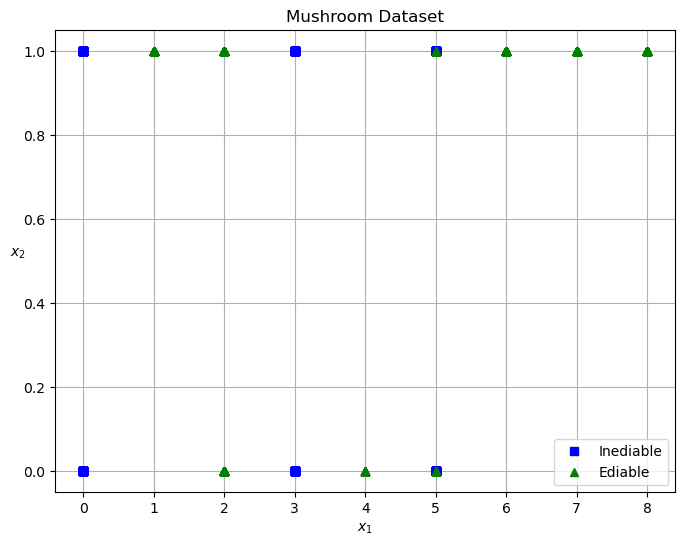

In [618]:
plt.figure(figsize=(8, 6))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Inediable")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Ediable")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation=0)
plt.title('Mushroom Dataset')
plt.legend()
plt.grid(True)
plt.show()

#### 2.3.2 The Decision Boundary

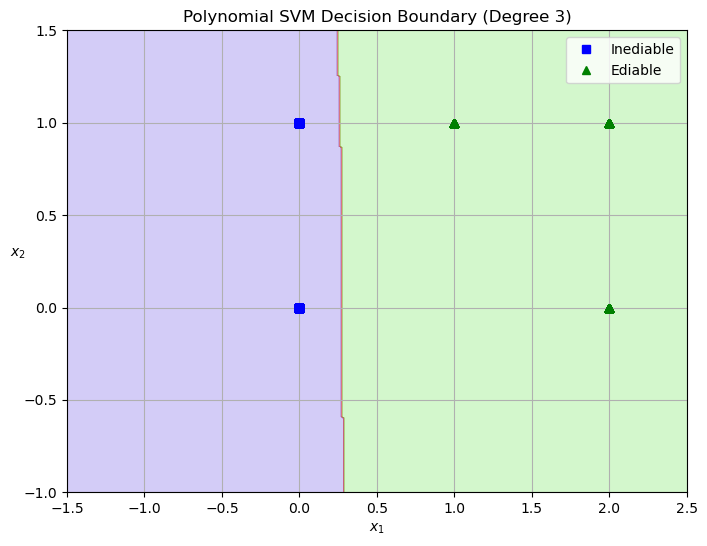

In [619]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Inediable")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Ediable")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.legend()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 300)
    x1s = np.linspace(axes[2], axes[3], 300)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_grid).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)


plt.figure(figsize=(8, 6))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x.values, y, [-1.5, 2.5, -1, 1.5])
plt.title("Polynomial SVM Decision Boundary (Degree 3)")
plt.show()